In [25]:
'''code written with ChatGPT and underwent human verification'''

filename = "Mb.fa"
residue_positions = [28, 42, 44, 63, 66, 67, 71, 106, 110] # residue number-1
output_filename = "output.csv"
residue_info = {
    29: 'L', 43: 'F', 45: 'R', 64: 'V', 67: 'T', 68: 'A',
    72: 'L', 107: 'I', 111: 'I'
}
#residue_numbers = [L29, F43, R45, V64, T67, A68, L72, I107, I111]# Set residue numbers as x-axis labels

In [26]:
import csv

def parse_fasta(filename):
    entries = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 2):
            entry = {}
            header = lines[i].strip().split(',')
            entry['id'] = int(header[1].split('=')[1])  # Extracting ID from the fasta file
            entry['overall_confidence'] = float(header[4].split('=')[1])
            entry['ligand_confidence'] = float(header[5].split('=')[1])
            entry['seq_rec'] = float(header[6].split('=')[1])
            sequence = lines[i+1].strip()
            entry['sequence'] = sequence
            residues = [sequence[idx] for idx in residue_positions]
            entry['residues'] = residues
            entries.append(entry)
    return entries

def save_to_csv(entries, output_filename):

    header = ['id', 'overall_confidence', 'ligand_confidence', 'seq_rec'] + [f"residue_{pos}" for pos in residue_positions]

    with open(output_filename, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=header)
        writer.writeheader()
        for entry in entries:
            row = {
                'id': entry['id'],
                'overall_confidence': entry['overall_confidence'],
                'ligand_confidence': entry['ligand_confidence'],
                'seq_rec': entry['seq_rec']
            }
            for idx, pos in enumerate(residue_positions):
                row[f"residue_{pos}"] = entry['residues'][idx]
            writer.writerow(row)


entries = parse_fasta(filename)

save_to_csv(entries, output_filename)

print("Output saved to:", output_filename)




Output saved to: output.csv


In [27]:
def count_residue_occurrences(entries):
    residue_counts = {pos: {} for pos in residue_positions}

    for entry in entries:
        for idx, pos in enumerate(residue_positions):
            residue = entry['residues'][idx]
            residue_counts[pos][residue] = residue_counts[pos].get(residue, 0) + 1

    return residue_counts

entries = parse_fasta(filename)

residue_counts = count_residue_occurrences(entries)

# Printing the occurrence counts for each residue position
for pos, counts in residue_counts.items():
    print(f"Residue at position {pos}: {counts}")


Residue at position 28: {'I': 471, 'L': 27, 'A': 2}
Residue at position 42: {'F': 500}
Residue at position 44: {'A': 500}
Residue at position 63: {'A': 500}
Residue at position 66: {'A': 112, 'T': 388}
Residue at position 67: {'A': 500}
Residue at position 71: {'L': 500}
Residue at position 106: {'S': 500}
Residue at position 110: {'I': 500}


In [28]:
def calculate_frequencies(entries):
    amino_acids = set()
    amino_acid_counts = {}

    # Collect all unique amino acids
    for entry in entries:
        for residue in entry['residues']:
            amino_acids.add(residue)

    # Initialize count dictionary
    counts = {pos: {aa: 0 for aa in amino_acids} for pos in residue_positions}

    # Count occurrences of each amino acid at each position
    for entry in entries:
        for idx, residue in enumerate(entry['residues']):
            counts[residue_positions[idx]][residue] += 1

    # Initialize frequency dictionary
    frequencies = {aa: [0] * len(residue_positions) for aa in amino_acids}

    # Calculate frequencies
    for idx in range(len(residue_positions)):
        total_count = sum(counts[residue_positions[idx]].values())
        for aa in amino_acids:
            frequencies[aa][idx] = counts[residue_positions[idx]][aa] / total_count if total_count > 0 else 0

    return frequencies

entries = parse_fasta(filename)
frequencies = calculate_frequencies(entries)

# Format the frequencies into the required variable format
data = {aa: freqs for aa, freqs in frequencies.items()}

# Print the data
print("data =", data)


data = {'A': [0.004, 0.0, 1.0, 1.0, 0.224, 1.0, 0.0, 0.0, 0.0], 'I': [0.942, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'F': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'T': [0.0, 0.0, 0.0, 0.0, 0.776, 0.0, 0.0, 0.0, 0.0], 'L': [0.054, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'S': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]}


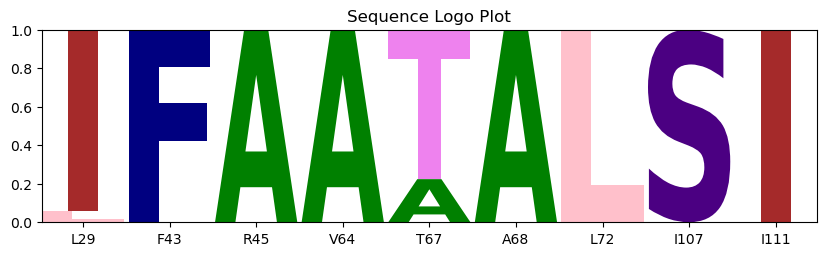

In [29]:
import logomaker
import pandas as pd

def plot_logo(data):
    # Convert the data dictionary into a pandas DataFrame
    df = pd.DataFrame(data)
    
    residue_labels = [f"{residue_info[pos]}{pos}" for pos in residue_info.keys()]
    
    # Define color scheme for amino acid letters
    color_scheme = {    
        'A': 'green', 'R': 'red', 'N': 'blue', 'D': 'purple', 'C': 'cyan',
    'Q': 'orange', 'E': 'magenta', 'G': 'yellow', 'H': 'lime', 'I': 'brown',
    'L': 'pink', 'K': 'teal', 'M': 'olive', 'F': 'navy', 'P': 'gold',
    'S': 'indigo', 'T': 'violet', 'W': 'turquoise', 'Y': 'salmon', 'V': 'steelblue'
}
    
    # Create the logo plot
    logo = logomaker.Logo(df, color_scheme=color_scheme)

    # Customize the appearance of the logo plot
    logo.style_xticks(fmt='%d', anchor=0, spacing=20)
    logo.ax.set_xticks(range(len(residue_labels)))
    logo.ax.set_xticklabels(residue_labels)
    logo.ax.set_title('Sequence Logo Plot')
    
    # Draw the plot
    logo.draw()

# Assuming 'data' variable is already defined
plot_logo(data)


